In [1]:
import pandas as pd
from pandas import DataFrame, Series

import sqlite3
import os

import matplotlib
from matplotlib import pyplot as plt

import requests
matplotlib.rcParams["font.size"] = 12

### Titanic dataset: https://www.kaggle.com/datasets/yasserh/titanic-dataset

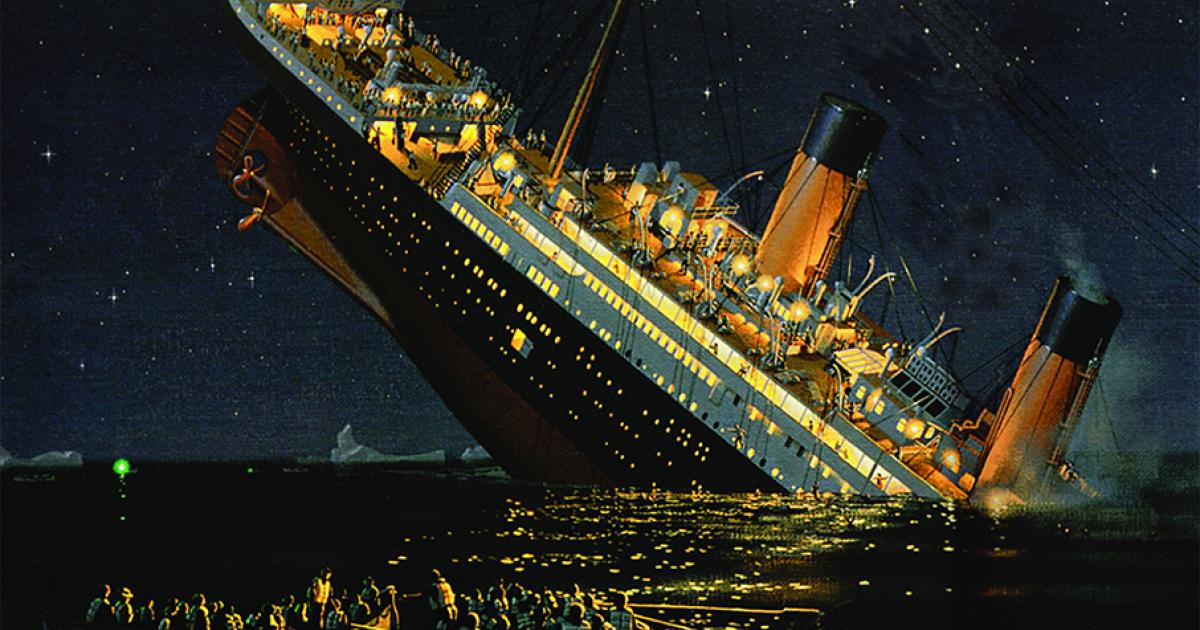

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.


A **copy** of the dataset can be found at: `https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-lecture-material/-/raw/main/s24/Common/shared_datasets/titanic.csv?ref_type=heads&inline=false`

## Warmup 1:  Requests and file writing

Download this file and save it locally in the file `titanic.csv`

In [3]:
# write your code here

# use requests to get this file
r = requests.get("https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-lecture-material/-/raw/main/s24/Common/shared_datasets/titanic.csv?ref_type=heads&inline=false")

# check that the request was successful


# open a file called "titanic.csv" for writing the data locally to avoid spamming the server


# write the text of response to the file object


# close the file object


## Warmup 2:  Making a DataFrame

Read the `"titanic.csv"` file that you just wrote out into a Pandas DataFrame named `titanic_df` and display the first few lines.

In [ ]:
# write your code here


## Warmup 3: Some of our column names are not very clear, let's change them.
These should be our headers: `"ID", "Survived", "Passenger Class", "Name", "Sex", "Age", "No. of Siblings/Spouses aboard", "No. of Parents/Children aboard", "Ticket Number", "Fare", "Cabin", "Location Embarked"`

Refer to the documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [ ]:
# write your code here
titanic_df = pd.read_csv("titanic.csv",
                 names=["ID", "Survived", "Passenger Class", "Name", "Sex", "Age", "No. of Siblings/Spouses aboard", 
                        "No. of Parents/Children aboard", "Ticket Number", "Fare", "Cabin", "Location Embarked"],
                 header=0)
titanic_df.head()

## Warmup 4: Connect to our database version of this data!

#### This following code will create a `titanic.db` file and write the contents of `titanic_df` into this Database

In [ ]:
titanic_conn = sqlite3.connect("titanic.db")
titanic_df.to_sql("titanic", titanic_conn, if_exists="replace", index=False)

In [ ]:
pd.read_sql("SELECT * FROM sqlite_master WHERE type='table'", titanic_conn)

In [ ]:
pd.read_sql("SELECT * FROM titanic LIMIT 5", titanic_conn)

## Warmup 5a: Using SQL, get the names of the 10 oldest male Titanic passengers

In [ ]:
# write your code here
pd.read_sql("""

""", titanic_conn)

## Warmup 5b: Using Pandas (i.e. not SQL), get the names of the 10 oldest male Titanic passengers from the `titanic_df` DataFrame.

In [ ]:
# write your code here


## Warmup 6: Using SQL, get the average Fare for each Passenger Class.

In [ ]:
# write your code here
pd.read_sql("""

""", titanic_conn)

# Lecture 35:  Scatter Plots
**Learning Objectives**
- Set the marker, color, and size of scatter plot data
- Calculate correlation between DataFrame columns
- Use subplots to group scatterplot data

## Set the marker, color, and size of scatter plot data

To start, let's look at some made-up data about Trees.
The city of Madison maintains a database of all the trees they care for.

In [ ]:
trees = [
    {"age": 1, "height": 1.5, "diameter": 0.8},
    {"age": 1, "height": 1.9, "diameter": 1.2},
    {"age": 1, "height": 1.8, "diameter": 1.4},
    {"age": 2, "height": 1.8, "diameter": 0.9},
    {"age": 2, "height": 2.5, "diameter": 1.5},
    {"age": 2, "height": 3, "diameter": 1.8},
    {"age": 2, "height": 2.9, "diameter": 1.7},
    {"age": 3, "height": 3.2, "diameter": 2.1},
    {"age": 3, "height": 3, "diameter": 2},
    {"age": 3, "height": 2.4, "diameter": 2.2},
    {"age": 2, "height": 3.1, "diameter": 2.9},
    {"age": 4, "height": 2.5, "diameter": 3.1},
    {"age": 4, "height": 3.9, "diameter": 3.1},
    {"age": 4, "height": 4.9, "diameter": 2.8},
    {"age": 4, "height": 5.2, "diameter": 3.5},
    {"age": 4, "height": 4.8, "diameter": 4},
]
trees_df = DataFrame(trees)
trees_df.head()

### Scatter Plots
We can make a scatter plot of a DataFrame using the following function...

`df_name.plot.scatter(x="x_col_name", y="y_col_name", color="peachpuff")`

[Panda's Scatterplot Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)

## Example 1: Plot the trees data comparing a tree's age to its height
<pre>
 - What is `df_name`?
 - What is `x_col_name`?
 - What is `y_col_name`?
</pre>

In [ ]:
trees_df.plot.scatter(x="age", y="height", color="g")

#### Now plot with a little more beautification...
 - Use a new [color](https://matplotlib.org/3.5.0/_images/sphx_glr_named_colors_003.png)
 - Use a type of [marker](https://matplotlib.org/stable/api/markers_api.html)
 - Change the size (any int)

In [ ]:
trees_df.plot.scatter(x="age", y="height", color="r", marker="D", s=50) # D for diamond

#### And we can add a Title to our plot using the Axis returned value...

In [ ]:
ax = trees_df.plot.scatter(x="age", y="height", color="r", marker="D", s=50)
ax.set_title("Tree Age vs Height")

# Correlation

## Example 2: What is the correlation between our DataFrame columns?

In [ ]:
corr_df = trees_df.corr()
corr_df

## Exercise 1:  What is the correlation between age and height?

In [ ]:
# write your code to select out just that one value


### Varying Stylistic Parameters

In [ ]:
trees_df.plot.scatter(x="age", y="height", marker="H", s="diameter")

#### We should scale up the sizes to make them more easily visible

In [ ]:
trees_df.plot.scatter(x="age", y="height", marker="H", s=trees_df["diameter"] * 20) # this way allows you to make it bigger

## Use subplots to group scatterplot data

### Re-visit the Titanic Data

In [ ]:
titanic_df.head()

### How do we create a *scatter plot* for various *class types*?
First, gather all the class types.

#### In Pandas...

In [ ]:
classes = list(set(titanic_df["Passenger Class"]))
classes

#### In SQL...

In [ ]:
classes = sorted(list(pd.read_sql("""
    SELECT DISTINCT `Passenger Class`
    FROM titanic
""", titanic_conn)["Passenger Class"]))
classes

#### In reality, you can choose to write Pandas or SQL queries (or a mix of both!). For the rest of this lecture, we'll use Pandas.

In [19]:
# If you want to continue using SQL instead, don't close the connection!
titanic_conn.close()

## Exercise 2: Change this scatter plot so that the data is only for `Passenger class = 3`

In [ ]:
titanic_df.plot.scatter(x="Age", y="Fare")

## Exercise 3: Write a for loop that iterates through each Passenger Class and makes a plot for only that class

In [ ]:
# write your code here


#### Make the same series of plots, but this time make each plot a different color

In [ ]:
colors = ["blue", "green", "red"]

# write your code here


#### Make the same series of plots, but this time make each plot a different color AND marker

In [ ]:
colors = ["blue", "green", "red"]
markers = ["o", "^", "v"]


**Food for thought:** Did you notice that it made 3 plots? What's deceptive about this?

In [ ]:
colors = ["blue", "green", "red"]
markers = ["o", "^", "v"]
min_x = titanic_df["Age"].min()
max_x = titanic_df["Age"].max()
min_y = titanic_df["Fare"].min()
max_y = titanic_df["Fare"].max()

for i in range(len(classes)):
    pass_class = classes[i]
    
    # make a df just of just the data for this variety
    pass_class_df = titanic_df[titanic_df["Passenger Class"] == pass_class] 
    
    # make a scatter plot for this passenger class
    pass_class_df.plot.scatter(x="Age", y="Fare", label=pass_class, color=colors[i], marker=markers[i], xlim=(min_x, max_x), ylim=(min_y, max_y))

#### We have to be VERY careful to not crop out data. We'll talk about this next lecture...

### We can also make Subplots in plots, called an AxesSubplot, keyword `ax`

<pre>
1. if AxesSubplot ax passed, then plot in that subplot
2. if ax is None, create a new AxesSubplot
3. return AxesSubplot that was used
</pre>

In [ ]:
plot_area = None   # don't change this...look at this variable in the last line
colors = ["blue", "green", "red"]
markers = ["o", "^", "v"]
for i in range(len(classes)):
    pass_class = classes[i]
    
    # make a df just of just the data for this variety
    pass_class_df = titanic_df[titanic_df["Passenger Class"] == pass_class] 
    
    # make a scatter plot for this passenger class
    plot_area = pass_class_df.plot.scatter(x="Age", y="Fare", label=pass_class, color=colors[i], marker=markers[i], ax=plot_area)